In [ ]:
# Homework (Part One)
import os
import struct
import numpy as np

In [ ]:
n_epochs = 200
if 'TRAVIS' in os.environ:
    n_epochs = 200

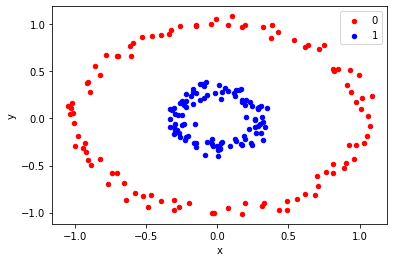

In [ ]:
from neuralnet import NeuralNetMLP
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.model_selection import train_test_split
X, y = make_circles(n_samples=200, factor=.3, noise=.05, random_state=1)
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
n_epochs = 200
mlp = NeuralNetMLP(n_hidden=4,  
                  l2=0.001,      
                  epochs=n_epochs,
                  eta=0.05,    
                  minibatch_size=160,
                  shuffle=True,
                  seed=1)
mlp.fit(X_train, 
       y_train,
       X_test,
       y_test)

200/200 | Cost: 6.88 | Train/Valid Acc.: 100.00%/100.00% 

In [ ]:
y_test_pred = mlp.predict(X_test)
acc = (np.sum(y_test == y_test_pred)
       .astype(np.float) / X_test.shape[0])
print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 100.00%


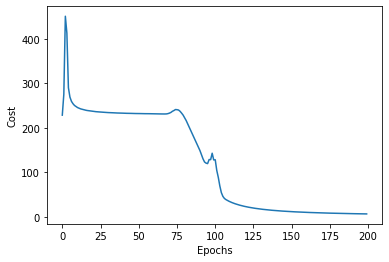

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(mlp.epochs), mlp.eval_['cost'])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

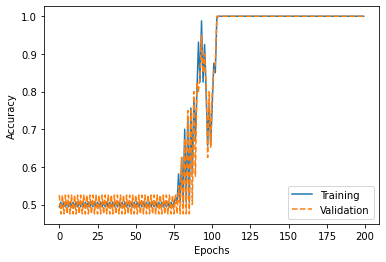

In [ ]:

plt.plot(range(mlp.epochs),mlp.eval_['train_acc'], 
         label='Training')
plt.plot(range(mlp.epochs), mlp.eval_['valid_acc'], 
         label='Validation', linestyle='--')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


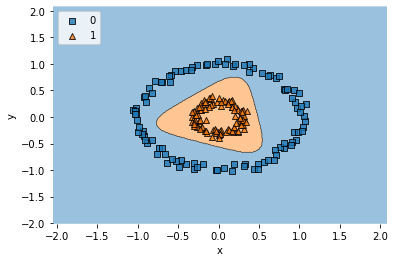

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=mlp)
plt.xlabel('x') 
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Homework Part two
# Special award for anyone who modifies the tensorflow model to fit a parabola.

# I have done this part with two soloutions that both of them get a good result.

# First solution:
# In the first solution I use Polynomial Regression and Sequential class. It tries different polynomial terms for a polynomial model. (y= b + w1*x +w2*x^2 +....+ wn*x^n)
# I try different polynomial terms for finding a polynomial model which fits my data well.(So, I try different degrees until get a good result(Best MSE))

# Second solution:
# I improve the chapter 13 code and build a non-linear regression model.(y= b + w1*x +w2*x^2 +....+ wn*x^n)
# I define different quadratic equations to find which one fits my data well.

#Reference:
# Raschka's book
# https://saylordotorg.github.io/text_elementary-algebra/s12-05-graphing-parabolas.html
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
# https://keras.io/losses/
# https://keras.io/optimizers/
# https://kite.com/python/docs/sklearn.preprocessing.PolynomialFeatures
# https://arxiv.org/pdf/1802.05074.pdf


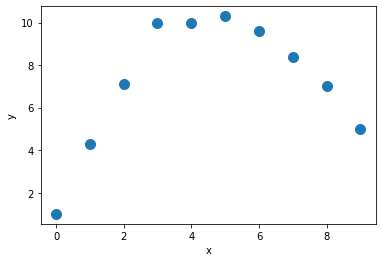

In [ ]:
# As we know that any linear equation with two variables can be written in the form y= ax+b and we can classify data with a linear line (Like ch13 example)
# But when we plot this data, we see that the dataset is not linear. The data has a parabola shape. so, it has a quadratic equation. We, should find a good quadratic equation and polynomial model for our data.
# quadratic equation: y= b + w1*x +w2*x^2 +....+ wn*x^n
# We have to try different values of n and check which one gets a better result (fit our data better).

import matplotlib.pyplot as plt
import tensorflow as tf
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 4.3, 7.1,
                    10.0, 10.0, 10.3,
                    9.6, 8.4, 7.0,
                    5.0])
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Firstly, we should scaling the data 
X_scaled =X_train/max(X_train)
y_scaled = y_train/max(y_train)

In [ ]:
# First Solution: parabola(2-d)
# I need try different polynomial terms to find a good polynomial model.
# For calculating polynomial features, I use sklearn.preprocessing.PolynomialFeatures which makes polynomial terms of our data. 
# Firstly, I try 2 degree.

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)                                      
X_2 = poly.fit_transform(X_scaled.reshape(-1,1))
print(X_2.shape)
print(X_2[0])

(10, 3)
[1. 0. 0.]


In [ ]:
# Training a model with polynomial terms in the dataset.

# I test Adam, Nadam(mse=0.64), RMSprop(mse=0.16) optimizer, Adam gets a better result.
# I tried different values for Adam's learning rate. learning-rate=0.3 works well for this model
# According what I read in ch13 and on the Internet, I use tf.keras.Sequential as my model.
# Also, by increasing epochs, I get a better resault.

# https://keras.io/losses/
# https://keras.io/optimizers/
# https://arxiv.org/pdf/1802.05074.pdf

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[3])])
optimizer = tf.keras.optimizers.Adam(0.3)
model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=['accuracy'])
tf_history = model.fit(X_2, y_scaled, epochs=500, verbose=True)


Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.1000
Epoch 3/500
1/1 [==============================] - 0s 852us/step - loss: 0.4096 - accuracy: 0.1000
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 0.3972 - accuracy: 0.1000
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1543 - accuracy: 0.1000
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0474 - accuracy: 0.1000
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1403 - accuracy: 0.0000e+00
Epoch 8/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2407 - accuracy: 0.0000e+00
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2118 - accuracy: 0.0000e+00
Epoch 10/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1086 - accuracy: 0.1000
Epoch 11/50

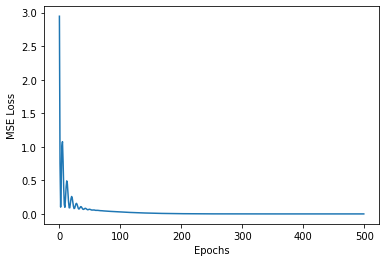

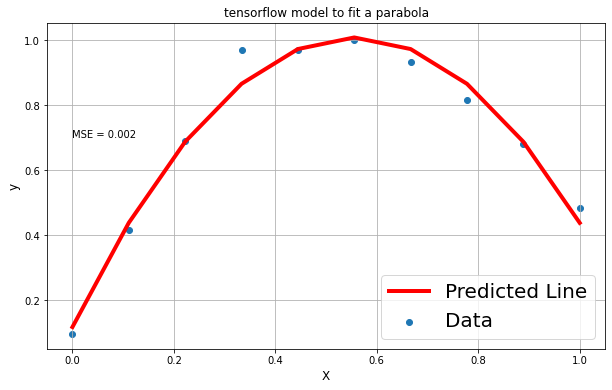

In [ ]:
# Visualize the prediction of the model

plt.plot(tf_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()
mse = tf_history.history['loss'][-1]
y_hat = model.predict(X_2)
plt.figure(figsize=(10,6))
plt.title('tensorflow model to fit a parabola')
plt.scatter(X_2[:, 1], y_scaled, label='Data')
plt.plot(X_2[:, 1], y_hat, color='red', label='Predicted Line',linewidth=4.0)
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.text(0,0.70,'MSE = {:.3f}'.format(mse), fontsize=10)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()
# First plot shows that MSE Loss decrease and stays constant after some epochs.
# After Epoch 249/500 the model has constant loss: 1/1 [==============================] - 0s 2ms/step - loss: 0.0018  Which is low.


# Second plot shows that the model fits the data well and its MSE is 0.002. Which is good because it is close to zero.
# The plot shows that the model fits the data well. But, I am going to improve the model and try different models to evaluate their MSE.

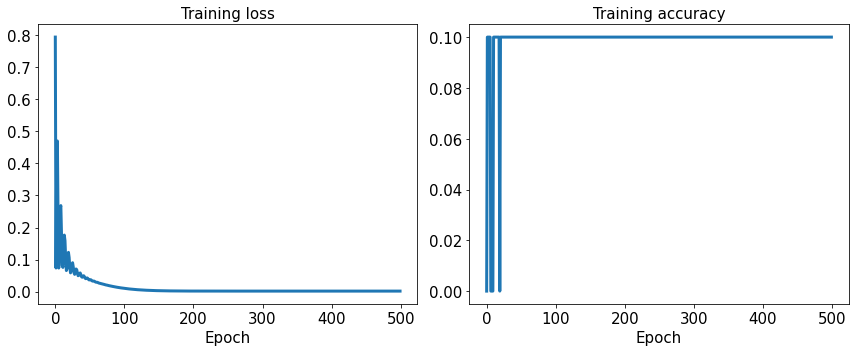

In [ ]:
# Visualizing learning curves.
# Returned value of history keeps the training loss and accuracy.
# After 20 epochs the model gets a constant accuracy.
#Epoch 21/500
#1/1 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.1000

hist =tf_history.history
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

plt.show()
# Plots show that trainig accuacy and loss are constant after some epochs. The results are good.

In [ ]:
# parabola(3-d) - I tried the model by using 3 degree, but its result (MSE) was not as good as (2-d). Also the model does not fit my data. So, I omitted its code
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3) 
                                        
X_3 = poly.fit_transform(X_scaled.reshape(-1,1))
print(X_3.shape)
print(X_3[0])

(10, 4)
[1. 0. 0. 0.]


In [ ]:
# *parabola(4-d) - 4 degree gets a good result
# 4th degree poly-regression also does a good job in fitting the data.
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)                                      
X_4 = poly.fit_transform(X_scaled.reshape(-1,1))
print(X_4.shape)
print(X_4[0])

(10, 5)
[1. 0. 0. 0. 0.]


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[5])])
optimizer = tf.keras.optimizers.Adam(0.3)
model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=['accuracy'])
tf_history = model.fit(X_4, y_scaled, epochs=500, verbose=True)

Epoch 1/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1242 - accuracy: 0.1000
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1104 - accuracy: 0.1000
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5724 - accuracy: 0.1000
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1299 - accuracy: 0.1000
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1846 - accuracy: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1727 - accuracy: 0.0000e+00
Epoch 8/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.1000
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1060 - accuracy: 0.1000
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1931 - accuracy: 0.1000
Epoch 11/500
1/1 

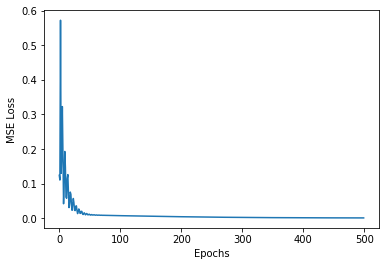

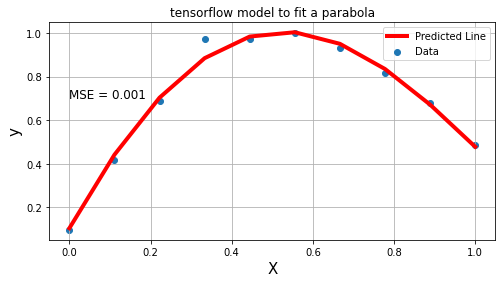

In [ ]:
# Plotting the result. 
# MSE= 0.001, which is great. So, I don't continue to try different polynomial terms.

plt.plot(tf_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()
mse = tf_history.history['loss'][-1]
y_hat = model.predict(X_4)
plt.figure(figsize=(8,4))
plt.title('tensorflow model to fit a parabola')
plt.scatter(X_4[:, 1], y_scaled, label='Data')
plt.plot(X_4[:, 1], y_hat, color='red', label='Predicted Line',linewidth=4.0)
plt.xlabel('X', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.text(0,0.70,'MSE = {:.3f}'.format(mse), fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()
# First plot shows that MSE Loss decrease and stays constant after some epochs.
# Second plot shows that the model fits the data well and its MSE is 0.001. Which is close to zero.

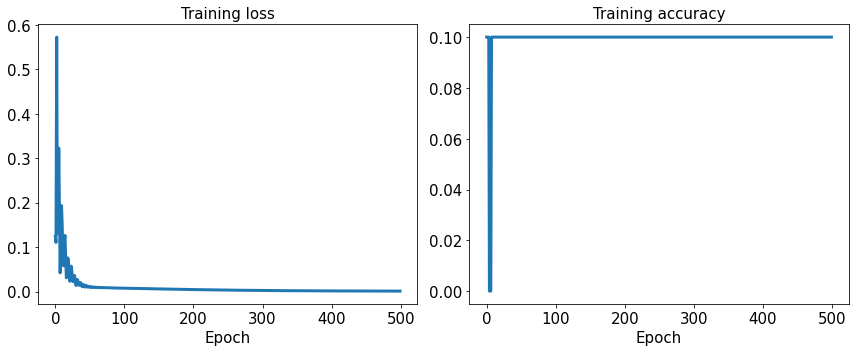

In [ ]:
hist =tf_history.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

plt.show()
# Plots show that trainig accuacy and loss are constant after some epochs. The results are good.

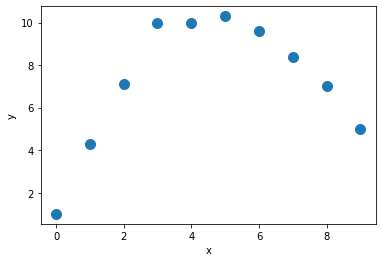

In [ ]:
# Second solution:
# Q: Perform the regression using tensorflow (Chapter 13) with this dataset:

# The chapter 13 data is linearly separable. So, we can classify the data with a simple linear line. The book uses  y= ax+b equation for classifying the data.
# But when we plot this data, we see that the dataset is non-linear, it has a parabola shape. so, it has a quadratic equation.So, I try to find a good quadratic equation
# and polynomial model for our data.
# quadratic equation: y= b + w1*x +w2*x^2 +....+ wn*x^n

X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 4.3, 7.1,
                    10.0, 10.0, 10.3,
                    9.6, 8.4, 7.0,
                    5.0])
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Making a tensorflow dataset
X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)
ds_train_orig = tf.data.Dataset.from_tensor_slices(
    (tf.cast(X_train_norm, tf.float32),
     tf.cast(y_train, tf.float32)))
ds_train_orig

<TensorSliceDataset shapes: ((1,), ()), types: (tf.float32, tf.float32)>

In [ ]:
# Second solution: 
# I improved the chapter 13 model and added more degree to its code.
# quadratic equation: y= b + w1*x +w2*x^2 +....+ wn*x^n
# I added some degrees and test three models.Also, I changed hyperparameters of models. The result is: Model:(y= b + w1*x + w2*x^2+ w3*x^3 ) fits our data well


# 1) Firstly, I define this quadratic model for the parabola shape data: y= b + w*x+ w2*x^2
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.w1 = tf.Variable(0.0, name='weight')
        self.w2 = tf.Variable(0.0, name='weight')
        self.b = tf.Variable(0.0, name='bias')

    def call(self, x):
        return  self.b + self.w1*x + self.w2*x*x
model = MyModel()
model.build(input_shape=(None, 1))
model.summary()
# Showing summary of the model.

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Defining the cost function to find optimal model weights.
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))
    
# testing the function:
yt = tf.convert_to_tensor([1.0])
yp = tf.convert_to_tensor([1.5])

loss_fn(yt, yp)

<tf.Tensor: shape=(), dtype=float32, numpy=0.25>

In [ ]:
# Training function
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss_fn(model(inputs), outputs)
    dW1,dw2, db = tape.gradient(current_loss, [model.w1, model.w2, model.b])
    model.w1.assign_sub(learning_rate * dW1)
    model.w2.assign_sub(learning_rate * dw2)
    model.b.assign_sub(learning_rate * db)

In [ ]:
# Setting the hyperparameters and train the model for 300 epochs.
tf.random.set_seed(1)
num_epochs = 300
log_steps = 100
learning_rate = 0.001
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train) / batch_size))
ds_train = ds_train_orig.shuffle(buffer_size=len(y_train))
ds_train = ds_train.repeat(count=None)
ds_train = ds_train.batch(1)

Ws1, Ws2, bs = [],[],[]

for i, batch in enumerate(ds_train):
    if i >= steps_per_epoch * num_epochs:
        break
    Ws1.append(model.w1.numpy())
    Ws2.append(model.w2.numpy())
    bs.append(model.b.numpy())

    bx, by = batch
    loss_val = loss_fn(model(bx), by)

    train(model, bx, by, learning_rate=learning_rate)
    if i%log_steps==0:
        print('Epoch {:4d} Step {:2d} Loss {:6.4f}'.format(
              int(i/steps_per_epoch), i, loss_val))

Epoch    0 Step  0 Loss 92.1600
Epoch   10 Step 100 Loss 2.9098
Epoch   20 Step 200 Loss 48.4361
Epoch   30 Step 300 Loss 1.9568
Epoch   40 Step 400 Loss 43.2288
Epoch   50 Step 500 Loss 37.1262
Epoch   60 Step 600 Loss 17.4571
Epoch   70 Step 700 Loss 16.1538
Epoch   80 Step 800 Loss 24.6241
Epoch   90 Step 900 Loss 24.0195
Epoch  100 Step 1000 Loss 4.3234
Epoch  110 Step 1100 Loss 0.1564
Epoch  120 Step 1200 Loss 2.1686
Epoch  130 Step 1300 Loss 0.0015
Epoch  140 Step 1400 Loss 3.1168
Epoch  150 Step 1500 Loss 6.2478
Epoch  160 Step 1600 Loss 8.8401
Epoch  170 Step 1700 Loss 11.5799
Epoch  180 Step 1800 Loss 0.0085
Epoch  190 Step 1900 Loss 6.0329
Epoch  200 Step 2000 Loss 5.0389
Epoch  210 Step 2100 Loss 0.0099
Epoch  220 Step 2200 Loss 2.7295
Epoch  230 Step 2300 Loss 1.4058
Epoch  240 Step 2400 Loss 3.1923
Epoch  250 Step 2500 Loss 0.0618
Epoch  260 Step 2600 Loss 0.6329
Epoch  270 Step 2700 Loss 0.0594
Epoch  280 Step 2800 Loss 0.5582
Epoch  290 Step 2900 Loss 0.0170


Final Parameters: 1.0515895 -2.163274 9.033523


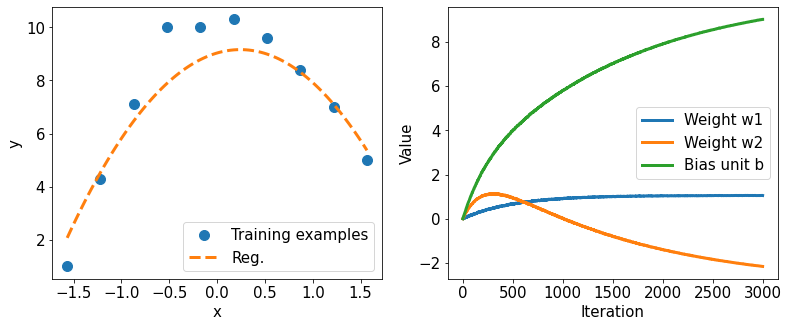

In [ ]:
# Making test data and plotting training samples and the training the non-linear model.

print('Final Parameters:', model.w1.numpy(),model.w2.numpy(), model.b.numpy())

# Creating a Numpy array of values evenly between zero to nine for test data.
X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)

# This plot shows us how well our model fit the data.
y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(Ws1, lw=3)
plt.plot(Ws2, lw=3)
plt.plot(bs, lw=3)
plt.legend(['Weight w1', 'Weight w2', 'Bias unit b'], fontsize=15)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Value', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()


Epoch    0 Step  0 Loss 0.3688
Epoch   10 Step 100 Loss 0.4314
Epoch   20 Step 200 Loss 0.0210
Epoch   30 Step 300 Loss 0.1141
Epoch   40 Step 400 Loss 0.0051
Epoch   50 Step 500 Loss 0.0009
Epoch   60 Step 600 Loss 0.0516
Epoch   70 Step 700 Loss 0.0444
Epoch   80 Step 800 Loss 0.0072
Epoch   90 Step 900 Loss 1.1871
Epoch  100 Step 1000 Loss 0.0009
Epoch  110 Step 1100 Loss 0.0454
Epoch  120 Step 1200 Loss 0.2672
Epoch  130 Step 1300 Loss 0.0100
Epoch  140 Step 1400 Loss 0.2199
Epoch  150 Step 1500 Loss 0.0342
Epoch  160 Step 1600 Loss 0.0003
Epoch  170 Step 1700 Loss 1.1891
Epoch  180 Step 1800 Loss 0.0073
Epoch  190 Step 1900 Loss 0.0007
Epoch  200 Step 2000 Loss 0.0084
Epoch  210 Step 2100 Loss 0.0112
Epoch  220 Step 2200 Loss 0.0519
Epoch  230 Step 2300 Loss 0.1772
Epoch  240 Step 2400 Loss 0.0002
Epoch  250 Step 2500 Loss 0.0408
Epoch  260 Step 2600 Loss 0.0005
Epoch  270 Step 2700 Loss 0.0483
Epoch  280 Step 2800 Loss 0.1798
Epoch  290 Step 2900 Loss 0.2686
Epoch  300 Step 3000 

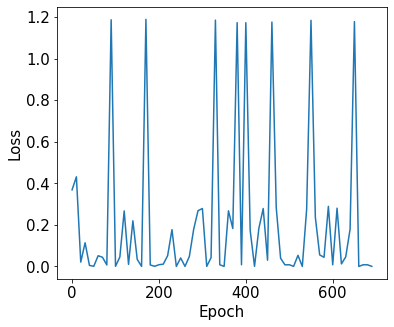

In [ ]:
# cell 29
# By changinh hyper parameters and increasing the learning rate, I get a better result for the model: y= b + w1*x +w2*x^2

tf.random.set_seed(1)
num_epochs = 700
log_steps = 100
learning_rate = 0.01
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train) / batch_size))
ds_train = ds_train_orig.shuffle(buffer_size=len(y_train))
ds_train = ds_train.repeat(count=None)
ds_train = ds_train.batch(1)
loss=[]
b=[]
Ws1, Ws2, bs = [],[],[]
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
for i, batch in enumerate(ds_train):
    if i >= steps_per_epoch * num_epochs:
        break
    Ws1.append(model.w1.numpy())
    Ws2.append(model.w2.numpy())
    bs.append(model.b.numpy())

    bx, by = batch
    loss_val = loss_fn(model(bx), by)
   


    train(model, bx, by, learning_rate=learning_rate)
    if i%log_steps==0:
        print('Epoch {:4d} Step {:2d} Loss {:6.4f}'.format(int(i/steps_per_epoch), i, loss_val))
        loss.append(loss_val)
        b.append(int(i/steps_per_epoch))


# ***** When I plot loss/epoch for the data, it shows me my network does not converge.****
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)        
plt.plot(b,loss)  


Final Parameters: 1.0629064 -3.0238144 10.297221


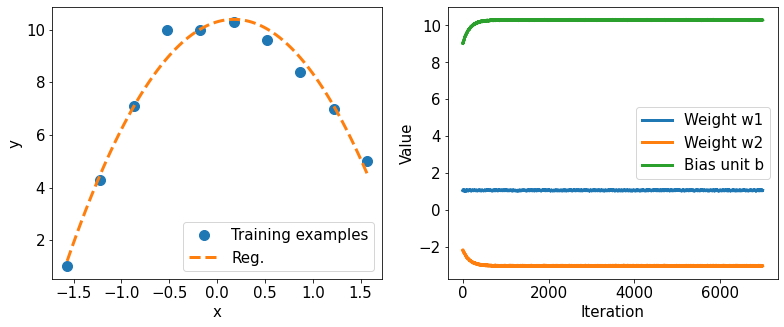

In [ ]:
# Making test data and plotting training samples and the training the non-linear model.

print('Final Parameters:', model.w1.numpy(),model.w2.numpy(), model.b.numpy())

# Creating a Numpy array of values evenly between zero to nine for test data.
X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)

# This plot shows us how well our model fit the data.
y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(Ws1, lw=3)
plt.plot(Ws2, lw=3)
plt.plot(bs, lw=3)
plt.legend(['Weight w1', 'Weight w2', 'Bias unit b'], fontsize=15)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Value', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [ ]:
# Since the previous model does not fit my data very well, I add a degree.
# My model is y= b + w1*x + w2*x*x+ w3*x*x*x
# This model works well

# First defining the model for: y= b + w1*x + w2*x*x+ w3*x*x*x
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.w1 = tf.Variable(0.0, name='weight')
        self.w2 = tf.Variable(0.0, name='weight')
        self.w3 = tf.Variable(0.0, name='weight')
        self.b = tf.Variable(0.0, name='bias')

    def call(self, x):
        return  self.b + self.w1*x + self.w2*x*x+ self.w3*x*x*x

model = MyModel()
model.build(input_shape=(None, 1))
model.summary()
# Showing summary of the model

Model: "my_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Defining the cost function to find optimal model weights.
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))
# testing the function:
yt = tf.convert_to_tensor([1.0])
yp = tf.convert_to_tensor([1.5])

loss_fn(yt, yp)

<tf.Tensor: shape=(), dtype=float32, numpy=0.25>

In [ ]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss_fn(model(inputs), outputs)
    dW1,dw2,dw3, db = tape.gradient(current_loss, [model.w1, model.w2,model.w3, model.b])
    model.w1.assign_sub(learning_rate * dW1)
    model.w2.assign_sub(learning_rate * dw2)
    model.w3.assign_sub(learning_rate * dw3)
    model.b.assign_sub(learning_rate * db)

In [ ]:
# Setting the hyperparameters and train the model for 300 epochs.These values give a better result in comparison with other values
# For this model, by increasing the learning rate I get a good result.
# this model fits my data well.

tf.random.set_seed(1)

num_epochs = 300
log_steps = 100
learning_rate = 0.01
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train) / batch_size))
ds_train = ds_train_orig.shuffle(buffer_size=len(y_train))
ds_train = ds_train.repeat(count=None)
ds_train = ds_train.batch(1)

Ws1, Ws2,Ws3, bs = [],[],[],[]

for i, batch in enumerate(ds_train):
    if i >= steps_per_epoch * num_epochs:
        break
    Ws1.append(model.w1.numpy())
    Ws2.append(model.w2.numpy())
    Ws3.append(model.w3.numpy())
    bs.append(model.b.numpy())

    bx, by = batch
    loss_val = loss_fn(model(bx), by)

    train(model, bx, by, learning_rate=learning_rate)
    if i%log_steps==0:
        print('Epoch {:4d} Step {:2d} Loss {:6.4f}'.format(
              int(i/steps_per_epoch), i, loss_val))

           

Epoch    0 Step  0 Loss 92.1600
Epoch   10 Step 100 Loss 6.6346
Epoch   20 Step 200 Loss 3.3752
Epoch   30 Step 300 Loss 0.3478
Epoch   40 Step 400 Loss 0.1974
Epoch   50 Step 500 Loss 0.0265
Epoch   60 Step 600 Loss 0.0208
Epoch   70 Step 700 Loss 0.0489
Epoch   80 Step 800 Loss 0.0072
Epoch   90 Step 900 Loss 0.5857
Epoch  100 Step 1000 Loss 0.1356
Epoch  110 Step 1100 Loss 0.1685
Epoch  120 Step 1200 Loss 0.0205
Epoch  130 Step 1300 Loss 0.0041
Epoch  140 Step 1400 Loss 0.0021
Epoch  150 Step 1500 Loss 0.0656
Epoch  160 Step 1600 Loss 0.0223
Epoch  170 Step 1700 Loss 0.5588
Epoch  180 Step 1800 Loss 0.0036
Epoch  190 Step 1900 Loss 0.0227
Epoch  200 Step 2000 Loss 0.0021
Epoch  210 Step 2100 Loss 0.0017
Epoch  220 Step 2200 Loss 0.0463
Epoch  230 Step 2300 Loss 0.0071
Epoch  240 Step 2400 Loss 0.0208
Epoch  250 Step 2500 Loss 0.1161
Epoch  260 Step 2600 Loss 0.1434
Epoch  270 Step 2700 Loss 0.1653
Epoch  280 Step 2800 Loss 0.0077
Epoch  290 Step 2900 Loss 0.0205


Final Parameters: 0.30717477 -3.0218573 0.42596188 10.288041


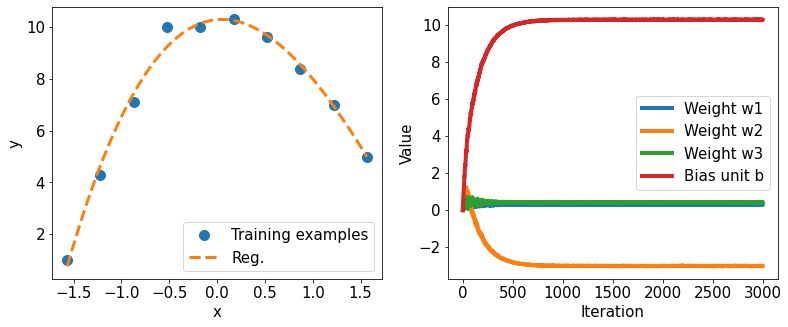

In [ ]:

# Making test data and plotting training samples and the training the non-linear model.

print('Final Parameters:', model.w1.numpy(),model.w2.numpy(),model.w3.numpy(),model.b.numpy())


# Creating a Numpy array of values evenly between zero to nine for test data.
X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)

# This plot shows us how well our model fits the data.
# using prediction values in the plot.
y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
# Plotting parameters
ax = fig.add_subplot(1, 2, 2)
plt.plot(Ws1, lw=4)
plt.plot(Ws2, lw=4)
plt.plot(Ws3, lw=4)
plt.plot(bs, lw=4)
plt.legend(['Weight w1', 'Weight w2', 'Weight w3', 'Bias unit b'], fontsize=15)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Value', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()
# by increasing the leaening rate, I get a good result. The plot shows that the model(y= b + w1*x + w2*x^2+ w3*x^3 ) fits the data well. 
# After about 500 iteration, four parameters stay constant.
# But, When I plot loss/epoch for the data, it shows me my network does not converge.(as I plot in cell 29)

In [ ]:
# I will add a degree, to test another quadratic equation.
# My model is y= b + w1*x + w2*x^2+ w3*x^3 + w4* x^4
# This model works well too.

# First defining the model for: y=self.b + self.w1*x + self.w2*x*x+ self.w3*x*x*x+ self.w4*x*x*x*x

class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.w1 = tf.Variable(0.0, name='weight')
        self.w2 = tf.Variable(0.0, name='weight')
        self.w3 = tf.Variable(0.0, name='weight')
        self.w4 = tf.Variable(0.0, name='weight')
        self.b = tf.Variable(0.0, name='bias')

    def call(self, x):
        return  self.b + self.w1*x + self.w2*x*x+ self.w3*x*x*x+ self.w4*x*x*x*x

model = MyModel()
model.build(input_shape=(None, 1))
model.summary()
# Showing summary of the model

Model: "my_model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Defining the cost function to find optimal model weights.
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))
# testing the function:
yt = tf.convert_to_tensor([1.0])
yp = tf.convert_to_tensor([1.5])

loss_fn(yt, yp)

<tf.Tensor: shape=(), dtype=float32, numpy=0.25>

In [ ]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss_fn(model(inputs), outputs)
    dW1,dw2,dw3,dw4, db = tape.gradient(current_loss, [model.w1, model.w2,model.w3,model.w4, model.b])
    model.w1.assign_sub(learning_rate * dW1)
    model.w2.assign_sub(learning_rate * dw2)
    model.w3.assign_sub(learning_rate * dw3)
    model.w4.assign_sub(learning_rate * dw4)
    model.b.assign_sub(learning_rate * db)

In [ ]:
# Setting the hyperparameters and train the model for 300 epochs.(These values give a better result in comparison with other values)
tf.random.set_seed(1)

num_epochs = 300
log_steps = 100
learning_rate = 0.03
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train) / batch_size))
ds_train = ds_train_orig.shuffle(buffer_size=len(y_train))
ds_train = ds_train.repeat(count=None)
ds_train = ds_train.batch(1)

Ws1, Ws2,Ws3,Ws4, bs = [],[],[],[],[]

for i, batch in enumerate(ds_train):
    if i >= steps_per_epoch * num_epochs:
        break
    Ws1.append(model.w1.numpy())
    Ws2.append(model.w2.numpy())
    Ws3.append(model.w3.numpy())
    Ws4.append(model.w4.numpy())
    bs.append(model.b.numpy())

    bx, by = batch
    loss_val = loss_fn(model(bx), by)

    train(model, bx, by, learning_rate=learning_rate)
    if i%log_steps==0:
        print('Epoch {:4d} Step {:2d} Loss {:6.4f}'.format(
              int(i/steps_per_epoch), i, loss_val))        

Epoch    0 Step  0 Loss 92.1600
Epoch   10 Step 100 Loss 124.3266
Epoch   20 Step 200 Loss 0.1172
Epoch   30 Step 300 Loss 715.1283
Epoch   40 Step 400 Loss 2.2981
Epoch   50 Step 500 Loss 5.9334
Epoch   60 Step 600 Loss 160361.6250
Epoch   70 Step 700 Loss 1.2510
Epoch   80 Step 800 Loss 9.8440
Epoch   90 Step 900 Loss 0.6655
Epoch  100 Step 1000 Loss 10.9721
Epoch  110 Step 1100 Loss 199.7099
Epoch  120 Step 1200 Loss 3.3720
Epoch  130 Step 1300 Loss 16.0198
Epoch  140 Step 1400 Loss 28.6580
Epoch  150 Step 1500 Loss 3098.4590
Epoch  160 Step 1600 Loss 9.5400
Epoch  170 Step 1700 Loss 0.4507
Epoch  180 Step 1800 Loss 0.6008
Epoch  190 Step 1900 Loss 0.5348
Epoch  200 Step 2000 Loss 0.1479
Epoch  210 Step 2100 Loss 1.3239
Epoch  220 Step 2200 Loss 0.1300
Epoch  230 Step 2300 Loss 0.0003
Epoch  240 Step 2400 Loss 1.3986
Epoch  250 Step 2500 Loss 0.1701
Epoch  260 Step 2600 Loss 0.3711
Epoch  270 Step 2700 Loss 2.7728
Epoch  280 Step 2800 Loss 0.2938
Epoch  290 Step 2900 Loss 0.0454


Final Parameters: 0.1848599 -3.5545235 0.2527137 0.2527137 10.429787


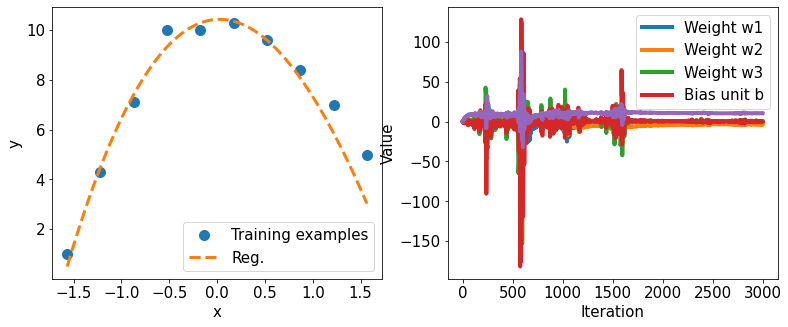

In [ ]:
# The plot shows that the model(y= b + w1*x + w2*x^2+ w3*x^3 + w4* x^4) fits the data good. But I think previous model:(y= b + w1*x + w2*x^2+ w3*x^3 ) fits our data well. 
# Making test data and plotting training samples and the training the non-linear model.

print('Final Parameters:', model.w1.numpy(),model.w2.numpy(),model.w3.numpy(),model.w3.numpy(),model.b.numpy())


# Creating a Numpy array of values evenly between zero to nine for test data.
X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)

# This plot shows us how well our model fit the data.
y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(Ws1, lw=4)
plt.plot(Ws2, lw=4)
plt.plot(Ws3, lw=4)
plt.plot(Ws4, lw=4)
plt.plot(bs, lw=4)
plt.legend(['Weight w1', 'Weight w2', 'Weight w3', 'Bias unit b'], fontsize=15)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Value', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()
# The plot shows that the model(y= b + w1*x + w2*x^2+ w3*x^3 + w4* x^4) fits the dat a good. But I think previous model:(y= b + w1*x + w2*x^2+ w3*x^3 ) fits our data well. 
# But, When I plot loss/epoch for the data, it shows me my network does not converge.(as I plot in cell 29)